<a href="https://colab.research.google.com/github/hayannn/AIFFEL_STUDY/blob/main/5_1_%ED%9A%8C%EA%B7%80%EC%86%8C%EA%B0%9C%265_2_%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%265_3_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95%265_4_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1%265_5_%EB%8B%A4%ED%95%AD%ED%9A%8C%EA%B7%80%2C%EA%B3%BC(%EB%8C%80)%EC%A0%81%ED%95%A9_%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9%265_6_%EB%A6%BF%EC%A7%80%2C%EB%9D%BC%EC%8F%98%2C%EC%97%98%EB%9D%BC%EC%8A%A4%ED%8B%B1%EB%84%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 회귀 소개
#### 회귀 분석
- 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립변수와 한 개의 종속변수 간 상관관계를 모델링하는 기법 통칭
- 선형 회귀식 : $Y = W_1*X_1 + W_2*X_2 + W_3*X_3 + ... + W_n*X_n$
  - Y : 종속변수(결정값), X : 독립변수(피처), W : 회귀 계수
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾는 것

| 독립변수 개수 | 회귀 계수의 결합 |
|------------|--------------|
| 1개: 단일 회귀 | 선형: 선형 회귀 |
| 여러 개: 다중 회귀 | 비선형: 비선형 회귀 |

<br>

#### 분류와의 차이
- 분류 : 예측값이 카테고리와 같은 이산형 클래스 값
- 회귀 : 예측값이 연속형 숫자 값

<br>

#### 선형 회귀 종류
> - 선형 회귀를 가장 많이 사용
  - 실제 값과 예측값의 차이(오류 제곱값)를 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제 : 일반적인 선형 회귀 과적합 문제 해결을 위해 회귀 계수에 패널티 값 적용하는 것

- `일반 선형 회귀` : 예측값과 실제값의 RSS를 최소화할 수 있도록 회귀 계수 최적화(규제 적용 X)
- `릿지(Ridge)` : 선형 회귀에 L2 규제 추가(상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듦)
- `라쏘(Lasso)` : 선형 회귀에 L1 규제 추가(예측 영향력이 적은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 하는 것)
- `엘라스틱넷(ElasticNet)` : L2, L1 규제 결합 모델, 피처가 많은 데이터 세트에서 적용, L1 규제로 피처 개수 줄임 + L2 규제로 계수 값 크기 조정
- `로지스틱 회귀(Logistic Regression)` : 분류 알고리즘임, 이진 분류, 희소 영역 분류(텍스트 분류 같은 영역에서 뛰어난 예측 성능을 보임)


# 02. 단순 선형 회귀를 통한 회귀 이해
#### 단순 선형 회귀
- 독립변수도 1개, 종속변수도 1개
- 예측값 $𝑦̂ = w_0 + w_1 * X$
  - 기울기 w1과 절편 w0를 회귀 계수로 지칭

<br>

#### 최적의 회귀 모델을 만든다는 것
- 전체 데이터 오류 값 합이 최소가 되는 모델을 만든다는 의미
- 오류 값 합이 최소가 될 수 있는 최적의 **회귀 계수**를 찾는다는 의미도 가능

<br>

#### 오류합 계산
- Mean Absolute Error : 절댓값을 취해 더하기
- RSS : 오류 값의 제곱을 구해 더하기 -> 주로 이용 -> $Error^2 = RSS$

<br>

#### RSS를 최소로 할 수 있는 회귀 계수를 찾는 것이 가장 중요
- w 변수 즉, 회귀 계수가 중심 변수임을 인지하는 것이 중요!
- 학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주

<br>

#### RSS 공식(feat. 손실함수)
- 회귀에서 RSS는 비용
- w 변수(회귀 계수)로 구성되는 RSS를 비용 함수로 칭함(=손실함수)
- 비용 함수가 반환하는 값(오류 값)을 지속 감소시키고 최종적으로는 더이상 감소하지 않는 최소 오류값을 구하는 것
![image](https://github.com/user-attachments/assets/0b445c6b-ab61-470b-9064-b3a48ef0b040)


# 03. 경사하강법(Gradient Descent)
- 점진적으로 반복적인 계산을 통해 W 파라미터 값을 업데이트하며 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해 보정해나감
- 핵심은 "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?"

#### 경사하강법 프로세스
- step 1
  - $w_1$, $w_0$를 임의 값으로 설정, 첫 손실 함수의 값 계산
- step 2
  - $w_1$을 $ w_1 + \eta \frac{2}{N} \sum_{i=1}^{N} x_i * (\text{실제값}_i - \text{예측값}_i)$, $w_0$을 $ w_0 + \eta \frac{2}{N} \sum_{i=1}^{N} x_i * (\text{실제값}_i - \text{예측값}_i)$으로 업데이트 -> 다시 손실 함수 값 계산
- step 3
  - 손실 함수가 감소하는 방향성으로 주어진 횟수만큼 Step 2 반복 -> $w_1$, $w_0$을 계속 업데이트



#### $Y=4X+6$ 근사하기 위한 100개 데이터 세트 만들기 + 경사하강법 적용

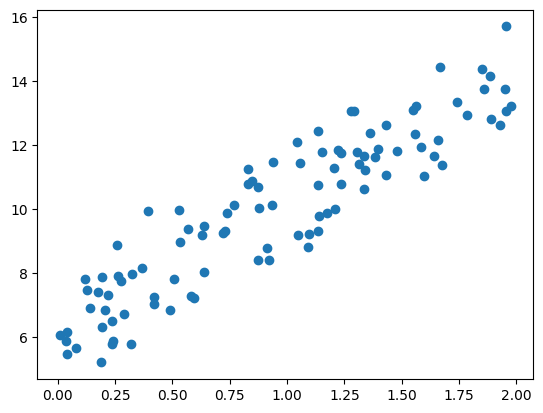

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만들어낸 것
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

- 손실 함수 정의

In [37]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

- $w_0$과 $w_1$의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성
  - 예측 배열 y_pred는 `np.dot(X, w1.T) + w0` 으로 구함
    - 100개의 데이터 X(1,2,...,100)이 있다면 -> 예측값은 w0 + X(1)*w1 + X(2)*w1 +..+ X(100)*w1 -> 입력 배열 X와 w1 배열의 내적!
  - 따라서 넘파이 내적 연산인 dot()를 이용해 예측 배열값 계산
 - w1_update로 $ - \eta \frac{2}{N} \sum_{i=1}^{N} x_i * (\text{예측오류}_i)$를, w0_update로 $ - \eta \frac{2}{N} \sum_{i=1}^{N}(\text{예측오류}_i)$ 값을 넘파이 dot 행렬 연산으로 계산해 반환!

In [38]:
# w1과 w0 를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [39]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

- 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성

In [40]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

- 예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행

In [41]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


- y_pred 기반 회귀선 그려보기

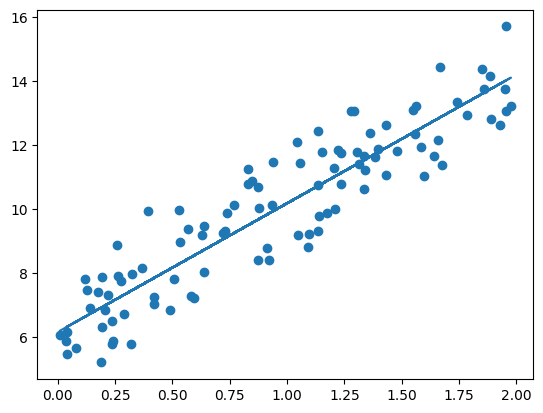

In [42]:
plt.scatter(X, y)
plt.plot(X,y_pred)

#### 확률적 경사 하강법
- 일반 경사 하강법은 오래걸리는 단점이 있음
- 일부 데이터만을 이용해 w가 업데이트되는 값을 계산
- 주로 확률적 경사 하강법 또는 미니 배치 확률적 경사 하강법을 통해 최적 손실 함수 도출

#### 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

In [43]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)

        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [44]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


#### 피쳐가 M개일 경우의 회귀 예측값
- $𝑦̂ = X_mat + W^T$
![image](https://github.com/user-attachments/assets/f15e69c4-1984-4f46-ba14-98a4ebcdf773)

# 04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
#### LinearRegression 클래스
- 입력 파라미터
  - fit_intercept : boolean 값, 디폴트 True, intercept(절편) 값 계산을 할건지 여부
  - normalize : boolean 값, 디폴트 False, True로 설정할 경우 회귀 수행 전 입력 데이터 세트의 정규화 진행(fit_intercept가 False라면 이 파라미터는 무시됨)
- 속성
  - coef_ : fit() 메서드 수행 시 회귀 계수가 배열 형태로 저장됨, Shape는 (Target 값 개수, 피처 개수)
  - intercept_ : intercept 값
- 피처 간 상관관계가 매우 높은 경우 -> 분산이 매우 커져 -> 오류에 매우 민감해짐(=다중공선성 문제)
![image](https://github.com/user-attachments/assets/812345e3-4685-4f26-b48f-87c8ebb77ae2)

| 평가 방법 | 사이킷런 평가 지표 API | Scoring 함수 적용 값 |
|---------|--------------------|-------------------|
| MAE | metrics.mean_absolute_error | 'neg_mean_absolute_error' |
| MSE | metrics.mean_squared_error | 'neg_mean_squared_error' |
| RMSE | metrics.mean_squared_error를 그대로 사용하되, squared 파라미터를 False로 설정 | 'neg_root_mean_squared_error' |
| MSLE | metrics.mean_squared_log_error | 'neg_mean_squared_log_error' |
| $R^2$ | metrics.r2_score | 'r2' |

- Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것
  - 'neg_' : 음수값을 가진다는 의미(사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문)
  - -1 * metrics.mean_absolute_error()

#### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

- 보스턴 데이터 삭제되어 사용 불가능
  - 해결 : [파이참(환경:m1x 맥북)에서 sklearn load_boston시, 아래와 같은 에러 메세지로 로딩해오지 못하는데요](https://www.codeit.kr/community/questions/UXVlc3Rpb246NjI1YTVkYmU0ZTkyZTc2MTBjMWFhYTM5)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지가 출력됨(무시)
%matplotlib inline

# boston 데이터셋 로드
boston = fetch_openml(name="boston", version=1, parser='auto')

# boston 데이터셋 DataFrame 변환
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array : 주택 가격 -> PRICE 컬럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이터셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


- 각 컬럼별로 주택가격에 미치는 영향도를 조사

In [46]:
print(bostonDF.dtypes)

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
PRICE       float64
dtype: object


- 범주형 -> 숫자형으로 변환

In [47]:
bostonDF['CHAS'] = bostonDF['CHAS'].astype('int')
bostonDF['RAD'] = bostonDF['RAD'].astype('int')

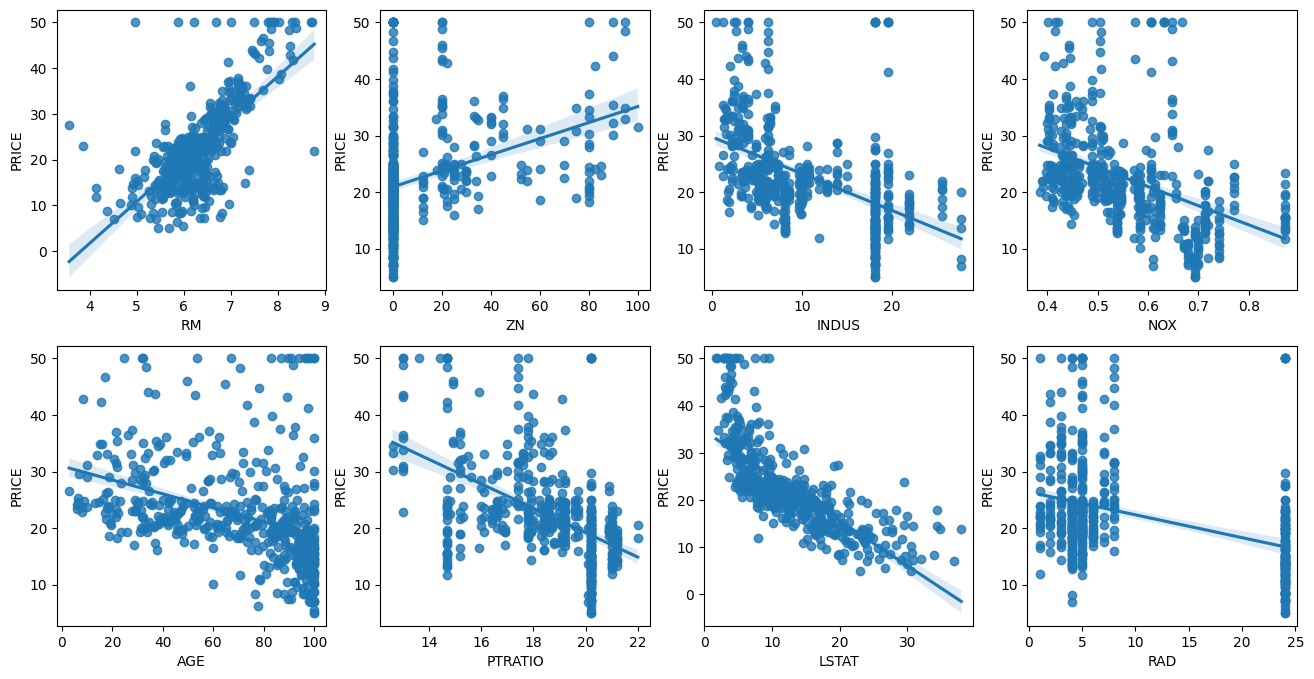

In [48]:
# 2개의 행과 4개의 열을 가진 subplots를 이용 -> axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

- RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남!
  - RM(방 개수) : 양 방향의 선형성(Positive Linearity)이 가장 큼
    - 방의 크기가 클수록 가격이 증가
  - LSTAT(하위 계층 비율) : 음 방향 선형성(Negative Linearity)이 가장 큼
  

- 학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [50]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


- coef_
  - 회귀 계수 값만 가지고 있기 때문에 피처별 회귀 계수 값으로 다시 매핑, 높은 값 순으로 출력
- RM이 양의 값으로 회귀 계수가 가장 큼 + NOX 피쳐의 회귀 계수 - 값이 다소 커보임
  - 최적화를 통해 피처 coefficients 변화가 같이 살펴볼 것

In [51]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


- 5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정
  - 회귀의 경우는, MSE 값이 낮을수록 좋은 회귀 모델
  - cross_val_score()에서 반환된 값에 다시 -1을 곱해야 -> 양의 값이 원래 모델에서 계산된 MSE값이 됨!

In [52]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 Fold 셋으로 MSE를 구한 뒤, 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE : 5.829 


# 05. Polynomial Regression과 오버피팅/언더피팅 이해
## Polynomial Regression 이해
- 다항 회귀식 : $y = w_0 + w_1*x_1 + w_2*x_2 + w3*x_1*x_2 + w_4*x_1^2 + w_5*x_2^2$
- 다항 회귀는 **선형 회귀**!
> 회귀에서 선형 회귀/비선형 회귀를 나누는 기준 : 회귀 계수가 선형/비선형인지에 따른 것, 독립변수의 선형/비선형 여부와는 무관
- 새 변수 z를 $z = [x_1, x_2, x_1*x_2, x_1^2, x_2^2]$로 한다면
  - $y = w_0 + w_1*z_1 + w_2*z_2 + w3*z_3 + w_4*z_4 + w_5*z_5$로 표현 가능 -> 여전히 선형 회귀

- 다항 회귀 곡선형으로 표현하는 것이 예측 성능이 더 높음!
- 사이킷런에서는 : 직접 바로 적용은 안되고, 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현
  - PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처
    - degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환

- PolynomialFeatures 클래스로 다항식 변환
  - 단항값 $[x_1, x_2]$를 2차 다항값 $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$로 변환

In [53]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성
  - 즉, 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$

In [54]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


- 3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습
  - 일차 단항식 계수 피처는 2개였지만 -> 3차 다항식 Polynomial 변환 이후 다항식 계수 피처가 10개로 늘어남
  

In [55]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


#### 코드 정리
- 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습
  - 사이킷런의 Pipeline 객체 : Feature 엔지니어링 변환과 모델 학습/예측을 순차 결합

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


#### 다항 회귀를 이용한 과소적합 및 과적합 이해
- 다항식의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져 정작 테스트 데이터 환경에서는 예측 정확도가 떨어짐 -> 과적합 문제 발생

- cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듦

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

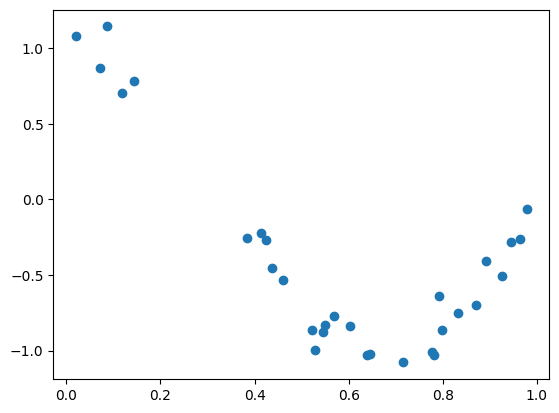

In [58]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


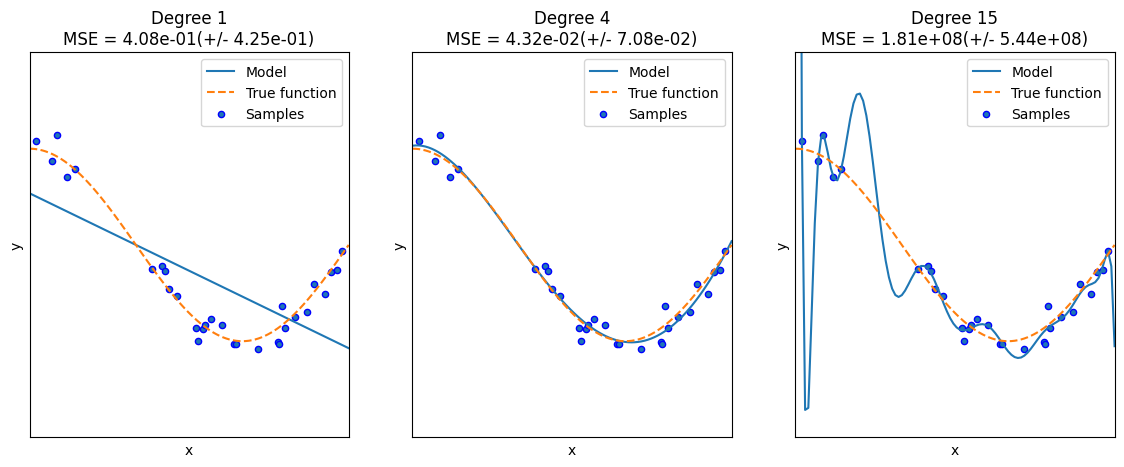

In [59]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키며 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고, 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선 : 다항 회귀 예측 곡선
- 점선 : 실제 데이터 세트 X, Y의 코사인 곡선
- 학습 데이터
  - 0부터 1까지의 30개의 임의의 X값과 코사인 Y값에 잡음을 변동값으로 추가해 구성
  - MSE 평가는 학습 데이터를 10개의 교차 검증 세트로 나눠 측정해 평균한 것

<br>

- Degree 1
  - 단순 선형 회귀
  - 예측 곡선이 학습 데이터 패턴을 제대로 반영하지 못하고 있는 과소적합 모델
  - MSE 값은 약 0.41
- Degree 4
  - 실제 데이터 세트와 유사
  - 변동 노이즈까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었음
  - MSE 값은 약 0.04(가장 뛰어난 성능)
- Degree 15
  - MSE 값이 182581084.83 -> 오류값 과다 발생(과적합 강조를 위한 조치였음)
  - 변동 노이즈를 지나치게 반영 -> 예측 곡선이 학습 데이터 세트만 정확히 예측, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선 생성
  - 학습 데이터에 너무 충실하게 맞춰진 과적합 모델이 되었음

#### 편향-분산 트레이드오프(Bias-Variance Trade off)
- Degree 1과 같은 모델
  - 매우 단순화된 모델
  - 지나치게 한 방향성으로 치우침
  - 고편향성(High Bias)을 가졌다고 표현
- Degree 15와 같은 모델
  - 학습 데이터 하나하나의 특성을 반영하며 매우 복잡한 모델이 되었음
  - 지나치게 높은 변동성을 가지게 됨
  - 고분산성(High Variance)을 가졌다고 표현

<br>

#### 편향과 분산의 특징
- 한쪽이 높으면 한쪽이 낮아지는 경향
- 편향이 높으면 분산은 낮아지고(과소적합)
- 분산이 높으면 편향이 낮아짐(과적합)

<br>

#### 편향과 분산의 관계에 따른 전체 오류 값(Total Error)의 변화
- 편향이 너무 높으면 전체 오류가 높음
- 편향을 점점 맞추면 동시에 분산이 높아지고 전체 오류도 낮아지게 됨
- 편향을 낮추고 분산을 높이며 전체 오류가 가장 낮아지는 **골디락스** 지점을 통과하며 분산을 지속적으로 높이면 -> 전체 오류 값이 오히려 증가하며 예측 성능이 다시 저하됨

> - 높은 편향/낮은 분산 : 과소적합
> - 낮은 편향/높은 분산 : 과적합
> - 편향과 분산이 서로 트레이드오프를 이루며 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 모델!

# 06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
### 규제 선형 모델의 개요
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함
- 손실 함수 : 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 균형을 이뤄야 함

<br>

### 과적합 개선 방법
- 회귀 계수의 크기를 제어
- 손실 함수의 목표가 $Min(RSS(W) + alpha * ||W||_2^2)$ 즉, 최소화하는 w 벡터를 찾는 것
  - w 값을 0 또는 매우 작게 만들어야 Cost가 최소화되는 손실 함수 목표를 달성할 수 있음
  - alpha 값을 크게 하면 -> 손실 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선
  - alpha 값을 작게 하면 -> 회귀 계수 W의 값이 커져도 어느 정도 상쇄 가능(학습 데이터 적합을 더 개선 가능)

> 즉, alpha를 0부터 지속적으로 값을 증가 -> 회귀 계수 값의 크기를 감소시킬 수 있음 -> 이것이 **규제!**

## 릿지 회귀
- L2 규제 계수 : alpha

In [64]:
# 앞의 LinearRegression 예제에서 분할한 feature 데이터셋인 X_data과 Target 데이터셋인 Y_target 데이터셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Boston 데이터셋 로드
boston = fetch_openml(name="boston", version=1, as_frame=True)

# DataFrame으로 변환 후, 누락된 값 처리
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# boston dataset의 target array는 주택 가격 -> PRICE 컬럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target

# 누락된 값 확인 및 제거
if bostonDF.isnull().sum().sum() > 0:
    bostonDF = bostonDF.dropna()

# 타겟과 특성 분리
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Ridge 회귀와 교차 검증 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_scaled, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.315 -24.117 -32.541 -78.387 -28.636]
5 folds의 개별 RMSE scores:  [3.364 4.911 5.705 8.854 5.351]
5 folds의 평균 RMSE: 5.637


- RMSE 평균 수치보다 더 뛰어난 예측 성능을 보여줌

<br>

- alpha값을 0, 0.1, 1, 10, 100으로 변경하면서 RMSE 측정
  - alpha가 100일 경우 가장 좋은 성능을 보임

In [66]:
# 릿지에 사용될 alpha 파라미터 값 정의
alphas = [0, 0.1, 1, 10, 100]

# alpha 값을 반복하면서 평균 RMSE 계산
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_scaled, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.826
alpha 1 일 때 5 folds 의 평균 RMSE : 5.803
alpha 10 일 때 5 folds 의 평균 RMSE : 5.637
alpha 100 일 때 5 folds 의 평균 RMSE : 5.421


- 각 alpha에 따른 회귀 계수 값 시각화
  - 각 alpha값별로 plt.subplots로 맷플롯립 축 생성
  - NOX 피처의 경우 alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아지고 있음

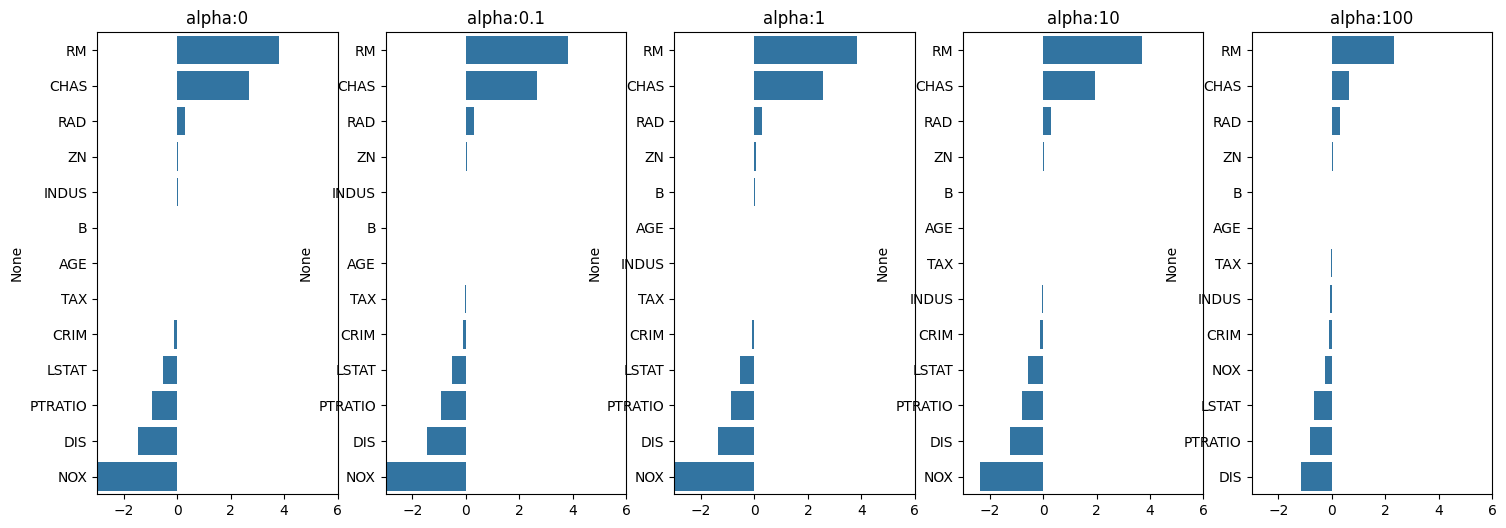

In [67]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff

    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화 -> 회귀 계수값이 높은순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

- alpha 값에 따른 컬럼별 회귀계수 출력
  - 릿지 회귀는 회귀 계수를 0으로 만들지는 않는다!

In [68]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## 라쏘 회귀
- W의 절댓값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것
  - L1 규제: $alpha * ||W||_1$을 의미
    - 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
    - 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있음
- 라쏘 회귀 손실함수의 목표
  - $RSS(W) + alphaZ*||W||_1$식을 최소화하는 W를 찾는 것


In [71]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('####### ', model_name , '#######')

    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)

        # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))

        # 회귀 계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

# Lasso에 사용할 alpha 파라미터 값 정의 후 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_scaled, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.676
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.658
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.843
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.078
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.281


- 교재와는 달리 alpha가 0.1일 때 가장 좋은 성능

In [72]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.778925,2.826269,2.974259,2.713355,1.708455
RAD,1.618828,1.195937,-0.000000,-0.000000,-0.000000
ZN,0.816504,0.708409,0.000000,0.000000,0.000000
B,0.787697,0.762165,0.543139,0.180957,0.000000
CHAS,0.667291,0.657607,0.397079,0.000000,0.000000
INDUS,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
AGE,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
CRIM,-0.722065,-0.632304,-0.115265,-0.000000,-0.000000
TAX,-1.187325,-0.846468,-0.000000,-0.000000,-0.000000
NOX,-1.705590,-1.574193,-0.000000,-0.000000,-0.000000


- alpha 크기 증가에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있음
- NOX 속성은 alpha가 0.5일떄부터 회귀 계수가 0
- alpha를 증가시키며 INDUS, CHAS 같은 속성 회귀 계수도 0이 됨을 알 수 있음

## 엘라스틱넷 회귀
- L2 규제와 L1 규제 결합한 회귀
- 엘라스틱넷 회귀의 손실함수 목표: $RSS(W) + alpha2 * ||W||_2^2 + alpha1 * ||W||_1$의 식을 최소화하는 W를 찾는 것
- 랏쏘 회귀의 alpha 값에 따른 회귀 계수의 값이 급격히 변동하는 현상을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것
- 단점: L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸림

<br>

- ElasticNet 클래스
  - alpha : a+b
  - l1_ratio : a / (a+b) -> l1_ratio가 0이면 a가 0 -> L2 규제와 동일
  


In [74]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_scaled, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.606
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.581
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.736
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.048
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.310


- alpha가 0.1일 때 RMSE가 5.581로 가장 좋은 예측 성능을 보이고 있음

In [75]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,2.797365,2.832209,2.847719,2.535178,1.510727
RAD,1.513212,1.163984,-0.000000,-0.000000,-0.000000
B,0.801476,0.781343,0.588305,0.407609,0.000000
ZN,0.798925,0.705485,0.052423,0.000000,0.000000
CHAS,0.688869,0.684941,0.511595,0.269028,0.000000
AGE,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
INDUS,-0.072995,-0.120597,-0.104735,-0.103949,-0.160120
CRIM,-0.730245,-0.662587,-0.311474,-0.229723,-0.000000
TAX,-1.102202,-0.830613,-0.141707,-0.244658,-0.215151
NOX,-1.609107,-1.453295,-0.407343,-0.117493,-0.000000


- 확실히 라쏘보다는 상대적으로 0이 되는 값이 적음

## 선형회귀의 경우, 최적의 하이퍼파라미터를 찾아내는 것 못지않게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요

### 선형 회귀 모델을 위한 데이터 변환
- 일반적으로 피처와 Taget값 간 선형 관계가 있다고 가정하고, 최적 선형함수를 찾아내 결과값 예측
- 피처와 Taget값 분포가 -> 정규분포(평균을 중심으로 종 모양으로 데이터 값이 분포된 형태) 형태를 매우 선호
- Target: 정규 분포 형태가 아닌 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적 영향
- 즉, 데이터 스케일링과 정규화 작업이 매우 중요!(심한 왜곡이 있다는 가정하에)

<br>

- 사이킷런을 이용한 피처 데이터 세트 변환 작업
  - StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화 수행
  - 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용해 변환(보통 바로 위 방법으로 예측 성능 변화가 없을 경우 사용)
  - 원래 값에 log 함수를 적용해 보다 정규 분포에 가까운 형태로 값을 분포시킴: 로그 변환
    - 가장 많이 사용!

<br>

- **Target 값의 경우 로그 변환을 적용하는 것이 가장 좋음**

In [90]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [92]:
X_data = pd.get_dummies(X_data)

In [93]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 22) (506, 22)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.851
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.700
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.512
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.391
(506, 22) (506, 22)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.893
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.868
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.705
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.561
(506, 275) (506, 22)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 12.515
alpha 1일 때 5 폴드 세트의 평균 RMSE: 8.946
alpha 10일 때 5 폴드 세트의 평균 RMSE: 6.228
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.124
(506, 22) (506, 22)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.554
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.923
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.550
(506, 275) (506, 22)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.523
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.412
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.242
alpha 10

- 결론 : 일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있음